In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import os 
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

# Trig Surface Model 

In [2]:
# load data
path_remote = os.path.join('~', 'Dropbox', 'WoonJuPark', 'Projects', 'AuditoryMotionRF')
path_datatable = os.path.join(path_remote, 'datatable')
datapath_a = os.path.join(path_datatable, 'Separability_params.csv')
params_a = pd.read_csv(datapath_a)

In [3]:
# choose colors
colorpalette = ["seagreen", "rebeccapurple"]

/var/folders/dm/rs68_nt90vvg9gxchlf5zjqc0000gn/T/ipykernel_8315/2718871500.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="group", y='Surf-a', data=params_a, order=["SC","EB"], alpha=.75, palette=colorpalette,
/var/folders/dm/rs68_nt90vvg9gxchlf5zjqc0000gn/T/ipykernel_8315/2718871500.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(x="group", y="Surf-a", data=params_a, order=["SC","EB"], join=False, color="0", ci=68,
/opt/homebrew/Cellar/jupyterlab/4.0.5/libexec/lib/python3.11/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


<Figure size 640x480 with 0 Axes>

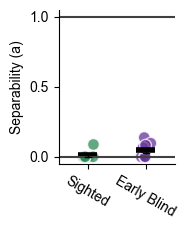

In [4]:
# plot
plt.figure(1)
plt.figure(figsize=(1.5,2))
plt.rcParams['font.family'] = "Arial"

plt.axhline(y=0, color=".25")
plt.axhline(y=1, color=".25")
sns.stripplot(x="group", y='Surf-a', data=params_a, order=["SC","EB"], alpha=.75, palette=colorpalette,
             edgecolor='white', linewidth=1, size=8.5, marker='o', zorder=1)
sns.pointplot(x="group", y="Surf-a", data=params_a, order=["SC","EB"], join=False, color="0", ci=68, 
             scale=2, markers='_', errwidth=1, capsize=0.1)

plt.ylabel('Separability (a)', fontsize=10);
plt.xlabel('');
plt.xticks([0, 1], ['Sighted', 'Early Blind'], fontsize=10, rotation=-30)
plt.yticks([0, 0.5, 1])

sns.despine()

plt.savefig('separability-a.pdf', dpi=300, transparent=True, bbox_inches="tight")

In [5]:
# stats
params_a_EB=params_a[params_a["group"]=="EB"]
params_a_SC=params_a[params_a["group"]=="SC"]
pg.mwu(x=params_a_EB['Surf-a'], y=params_a_SC['Surf-a'])

,U-val,alternative,p-val,RBC,CLES
MWU,40.0,two-sided,0.441803,-0.25,0.625


# Separable (a = 0) vs Non-separable (a = 1) 

In [6]:
# load data for model comparison 
datapath_comp = os.path.join(path_datatable, 'ModelComparison.csv')
params_comp = pd.read_csv(datapath_comp)

In [7]:
# stats
pg.mixed_anova(dv='crosscorr', within='model', between='group', subject='sub', data=params_comp)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,0.001537,1,14,0.001537,11.237115,0.004743,0.445261,NaN
1,model,0.000260,1,14,0.000260,46.597846,0.000008,0.768969,1.0
2,Interaction,0.000042,1,14,0.000042,7.566231,0.015624,0.350837,NaN


In [8]:
pg.pairwise_tests(dv='crosscorr', between='group', within='model', subject='sub', data=params_comp, 
                  padjust='holm', within_first=False)

/opt/homebrew/Cellar/jupyterlab/4.0.5/libexec/lib/python3.11/site-packages/pingouin/pairwise.py:478: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index=False, observed=True, sort=True).mean()


,Contrast,group,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,-,EB,SC,False,True,3.352181,14.0,two-sided,0.004743,NaN,NaN,8.951,1.584667
1,model,-,non-sep,sep,True,True,-5.693003,15.0,two-sided,0.000043,NaN,NaN,606.59,-0.509044
2,group * model,EB,non-sep,sep,True,True,-6.610354,7.0,two-sided,0.000301,0.000603,holm,110.002,-0.790787
3,group * model,SC,non-sep,sep,True,True,-2.955930,7.0,two-sided,0.021227,0.021227,holm,3.637,-0.450429


In [9]:
# load data for model fit difference
datapath_diff = os.path.join(path_datatable, 'ModelDiff.csv')
params_diff = pd.read_csv(datapath_diff)

/var/folders/dm/rs68_nt90vvg9gxchlf5zjqc0000gn/T/ipykernel_8315/640323073.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="group", y="diff", data=params_diff, order=['SC','EB'],
/opt/homebrew/Cellar/jupyterlab/4.0.5/libexec/lib/python3.11/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


<Figure size 640x480 with 0 Axes>

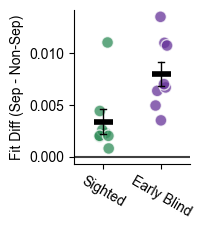

In [10]:
# plot
plt.figure(2)
plt.figure(figsize=(1.5,2))
plt.rcParams['font.family'] = "Arial"

sns.stripplot(x="group", y="diff", data=params_diff, order=['SC','EB'], 
              palette=colorpalette, alpha=.75, zorder=1, edgecolor='white', linewidth=1, size=8.5, marker='o')
sns.pointplot(x="group", y="diff", data=params_diff, color="0", order=['SC','EB'], scale=2, markers='_',
              errwidth=1, capsize=0.1, join=False, errorbar=('ci', 68))
plt.axhline(y=0, color=".25")

plt.xticks([0, 1], ['Sighted', 'Early Blind'], fontsize=10, rotation=-30)
plt.xlabel('');
plt.yticks([0, 0.005, 0.01])
plt.ylabel('Fit Diff (Sep - Non-Sep)');

sns.despine()
plt.savefig('separability-fitdiff.pdf', dpi=300, transparent=True, bbox_inches="tight")